In [11]:
#loading library and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from numpy.random import RandomState


data = pd.read_csv("data/student-mat.csv")


#### Exploratory Data Analaysis

In [20]:
#check missing data -> There are no missing data
data.isna().sum()

school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
G3             0
Final Grade    0
dtype: int64

<AxesSubplot:xlabel='Final Grade', ylabel='count'>

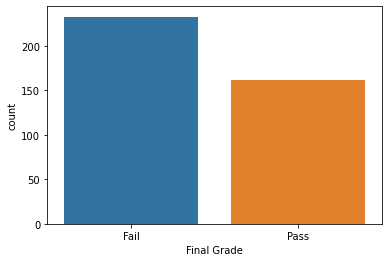

In [12]:
### Marking Final Grade as Categorical Value
data['Final Grade'] = np.where(data['G3'] >= 12, 'Pass', 'Fail')
sns.countplot(x = 'Final Grade',  data = data)

In [25]:
#Sample the data into train, test split 
rng = RandomState()
train = data.sample(frac=0.7, random_state=rng)
test = data.loc[~data.index.isin(train.index)]

display(train.shape)
display(test.shape)

#Saves the two dataframe to project directory 

#train.to_csv("train.csv", index=False)
#test.to_csv("test.csv", index=False)

(276, 34)

(119, 34)